Experiment B: Clustering in the Morpholigical Space

In [1]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import SpectralClustering, KMeans
import warnings
warnings.filterwarnings("ignore")
from scripts.genetic_utils import identify_spec, generate_pca_plot, generate_proportion_plot

In [2]:
df = pd.read_csv('data/morph.csv')
df = df.drop(['idx', 'Date', 'classification', 'uncertainty'], axis=1)
df = df.drop(['Latitude', 'Longitude', 'Altitude.ft', 'Multi.Single.stem', 'General.location.Habitat', 'site'], axis=1)
df.head()
# ref = pd.read_csv('data/gene_spec.csv')
# df = df.merge(ref, on='TreeNo')
# len(df)

,TreeNo,height,Putative_spp,log.BL,log.PL,log.BW,log.TLIW,log.TLL,log.TLDW,log.TEL,log.BLL,log.LLL,log.BSR,log.LSR,log.LLDW,log.LLIW,log.MidVeinD,log.BL_PL,Tufts,Lobe.number
0,M-QR2,1.5,QR,2.414960,0.451813,2.215436,0.971517,1.492824,1.236128,0.749326,-0.721076,1.248005,0.273287,1.937917,0.826713,1.051718,1.399480,2.546353,0.333333,7.333333
1,M-QA2,2.5,QA,2.429840,0.813196,2.272111,1.241901,0.652962,0.902493,-0.230920,-0.080406,0.940427,1.302997,2.247890,0.960641,1.349103,1.684123,2.610964,0.666667,7.000000
2,M-QA3,2.5,QA,2.723339,1.339852,2.577227,1.887415,1.372193,1.964269,0.576864,-0.086845,1.561296,1.107255,2.528339,1.453892,1.807344,2.135655,2.947045,0.666667,6.000000
3,M-QA4,3.0,QA,2.458778,0.678297,2.181339,1.478614,1.019372,1.268740,0.178144,-0.595116,0.928578,1.020238,2.269391,0.709607,1.198653,1.748606,2.614548,0.000000,8.333333
4,M-QA5,2.2,QA,2.523282,0.675473,2.434660,1.722535,1.445529,1.821472,0.509458,0.058145,1.409343,0.821479,2.189451,1.042951,1.410322,1.838945,2.669615,0.000000,7.000000


In [3]:
n_clusters = 3

df = df.dropna()
df = df.replace(0, 1e-10)

data = df.drop(['Putative_spp', 'TreeNo'], axis=1)

# # Standardize the data (important for PCA)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

In [4]:
# species_labels = df['Putative_spp'].to_numpy()

# max_score = 0
# max_indecies = []


# for i in range(50000):

#     n_features = np.random.randint(1, 7)
#     selected_features = np.random.choice(data.shape[1], n_features, replace=False)
#     data_reduced = data[:, selected_features]

#     cluster_labels = kmeans.fit_predict(data_reduced)
#     kmeans_score = adjusted_rand_score(species_labels, cluster_labels)

#     if kmeans_score > max_score:
#         max_score = kmeans_score
#         max_indecies = selected_features
    
#     print(f'KMeans score: {kmeans_score}')

# print(f'Max score: {max_score}')
# print(f'Max indecies: {max_indecies}')

KMeans score: 0.0864994468576658
KMeans score: 0.06067055019203605
KMeans score: 0.12008298566785824
KMeans score: 0.059443125721164065
KMeans score: 0.10864433888890035
KMeans score: 0.22797414520627252
KMeans score: 0.029511726080163853
KMeans score: -0.008554786726093135
KMeans score: 0.30655630819242635
KMeans score: 0.05970217535512501
KMeans score: 0.12008298566785824
KMeans score: 0.16806184195120838
KMeans score: 0.07730296979224201
KMeans score: 0.2995326018497033
KMeans score: 0.08618152694220417
KMeans score: 0.11478639886030419
KMeans score: 0.08055948683073869
KMeans score: 0.18050711727332822
KMeans score: 0.06686362108737844
KMeans score: 0.021090934115562284
KMeans score: 0.05099304804262148
KMeans score: 0.030006753597589485
KMeans score: 0.17799785290977274
KMeans score: 0.06260198663769559
KMeans score: 0.13631835597557304
KMeans score: 0.221413664115922
KMeans score: 0.06356074183410286
KMeans score: 0.24446696335427942
KMeans score: 0.14332951893646043
KMeans score

Morphological Freatures:
Adjusted Rand Index: 0.24624434959098407
Normalized Mutual Information: 0.2582920057573799


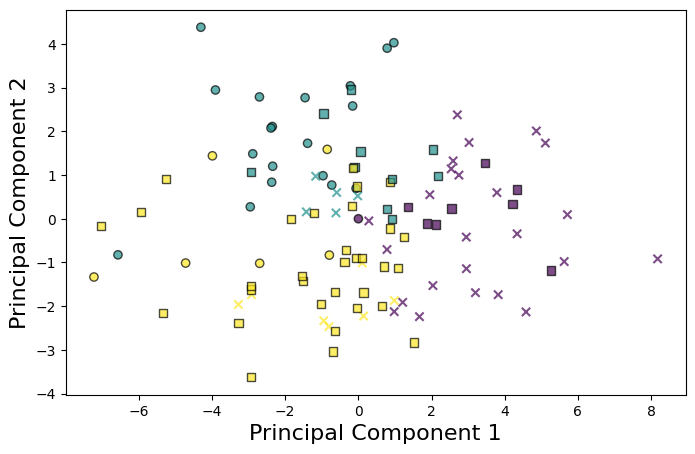

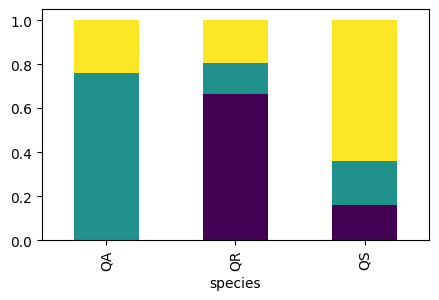

In [5]:
n_clusters = 3

df = df.dropna()
df = df.replace(0, 1e-10)

data = df.drop(['Putative_spp', 'TreeNo'], axis=1)

# # Standardize the data (important for PCA)
scaler = StandardScaler()
data = scaler.fit_transform(data)

data_reduced = data[:, [0, 11, 7, 12, 16]]

# perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_reduced)

# Create a DataFrame for plotting
species_labels = df['Putative_spp']

# Map species to markers
unique_species = species_labels.unique()
print("Morphological Freatures:")
generate_pca_plot(data, species_labels, cluster_labels, unique_species, n_clusters, title='Morphological Vectors Clustering (PCA)')
generate_proportion_plot(species_labels, cluster_labels, title='Morphological Vectors, Cluster Assignment by Species')
